In [19]:
import pandas as pd
import requests as rq
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import random


In [2]:
train_log = pd.read_csv("/work/sagarj/Work/BellLabs/Data/VGG_beauty_multiclass_crossEntropy.log.train")
test_log = pd.read_csv("/work/sagarj/Work/BellLabs/Data/VGG_beauty_multiclass_crossEntropy.log.test")

In [3]:
test_log

,NumIters,Seconds,LearningRate,accuracy,loss
0,0.0,7.099555,1.000000e-04,0.315599,1.09861
1,500.0,78.268971,1.000000e-04,0.424000,1.09305
2,1000.0,149.766404,1.000000e-04,0.416799,1.08976
3,1500.0,220.983212,1.000000e-04,0.415199,1.08727
4,2000.0,292.477813,1.000000e-04,0.432000,1.08181
5,2500.0,363.685289,1.000000e-04,0.411599,1.08555
6,3000.0,435.164497,1.000000e-05,0.415199,1.08386
7,3500.0,506.465420,1.000000e-05,0.429600,1.08089
8,4000.0,577.941852,1.000000e-05,0.416000,1.08419
9,4500.0,649.208514,1.000000e-05,0.425600,1.08103


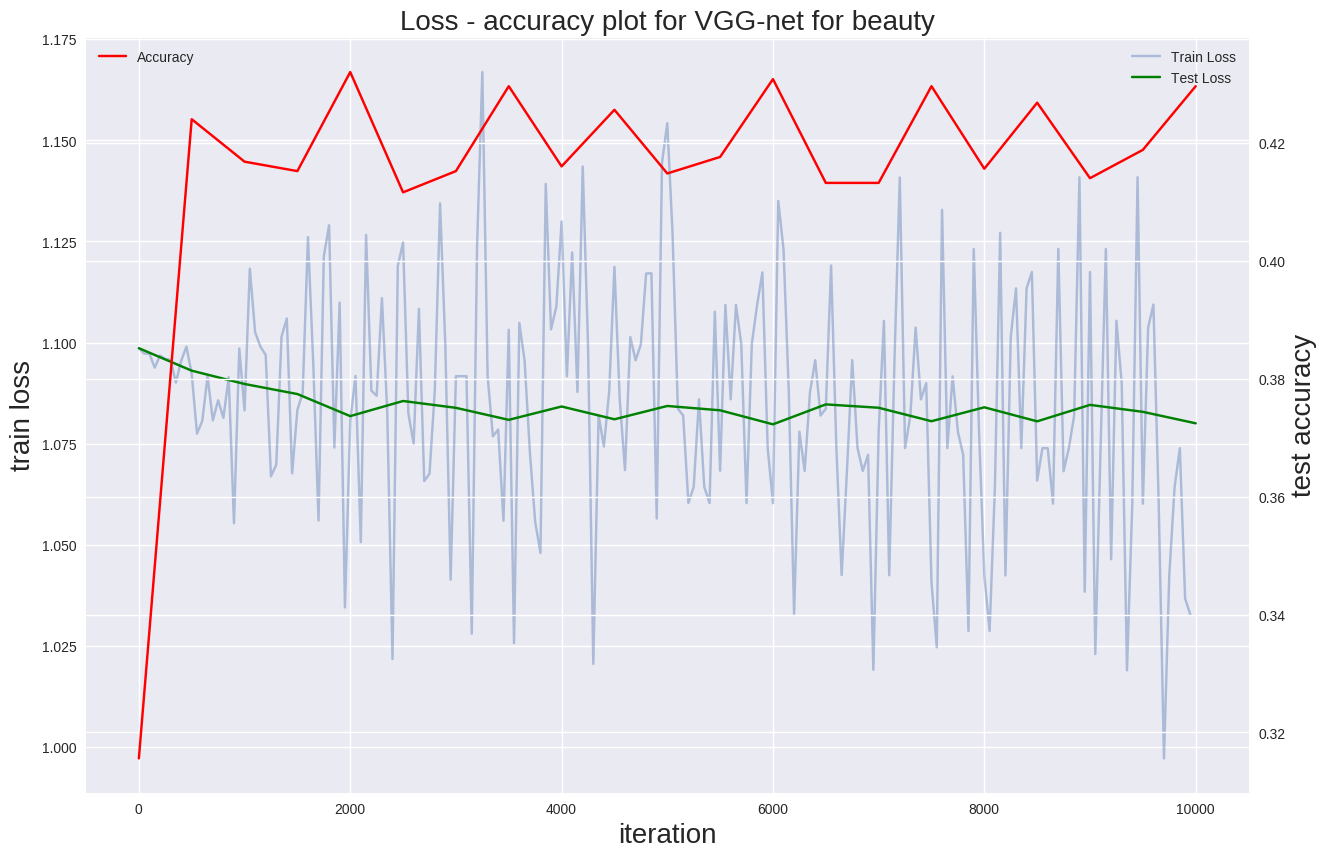

In [4]:
_, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax1.plot(train_log["NumIters"], train_log["loss"], alpha=0.4 )
ax1.plot(test_log["NumIters"], test_log["loss"], 'g')
ax2.plot(test_log["NumIters"], test_log["accuracy"], 'r')
ax1.set_xlabel('iteration', fontsize = 20)
ax1.set_ylabel('train loss' , fontsize = 20)
ax2.set_ylabel('test accuracy', fontsize = 20)
plt.title("Loss - accuracy plot for VGG-net for beauty" , fontsize = 20)

ax1.legend(["Train Loss" , "Test Loss"])
ax2.legend(["Accuracy"] , loc = 2)



In [8]:
PlaceFeats = "../Data/SVPlacesFeats.csv"
PlaceClasses = "../caffe_models/places/categoryIndex_places205.csv"
imageList = "../Data/streetViewPaths.txt"

In [20]:
#Feats = pd.read_csv(PlaceFeats , header = None)
Feats = np.genfromtxt(PlaceFeats,delimiter=',')

In [15]:
classes = pd.read_csv(PlaceClasses, header = None , delimiter = ' ')

In [10]:
with open(imageList,'r') as f:
    imgPaths = f.readlines()

In [11]:
imgId = [k.strip().split('/')[-1].split('.')[0] for k in imgPaths]

In [31]:
classes.keys()

Int64Index([0, 1], dtype='int64')

In [22]:
Feats.shape

(111389, 4301)

In [26]:
np.argpartition(Feats[0][-205:], -3)[-3:]

array([35, 95,  8])

In [29]:
Feats[0][-205:].argsort()[-3:][::-1]

array([95,  8, 35])

In [59]:
top5ImgScenes = {}
for i in range(len(imgId)):
    topScenes = Feats[i][-205:].argsort()[-5:][::-1]
    labels = [classes.iloc[k][0] for k in topScenes]
    top5ImgScenes[imgId[i]] = labels
    

In [80]:
N = -501
top5ImgScenes[top5ImgScenes.keys()[N]]

['/h/hospital_room',
 '/m/market/outdoor',
 '/h/harbor',
 '/p/parlor',
 '/k/kindergarden_classroom']

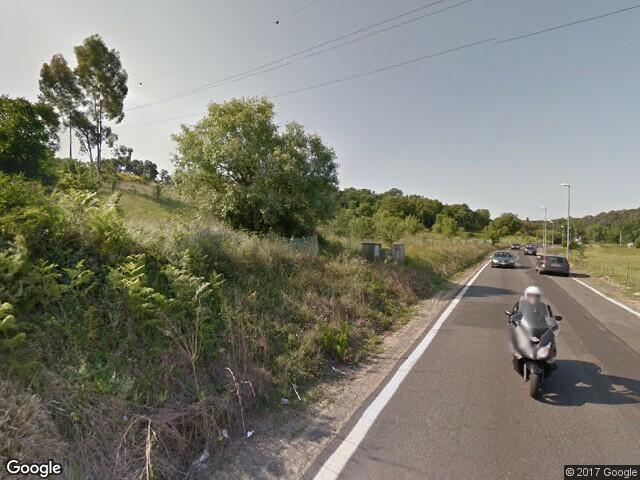

In [81]:
imgDir = "/datasets/sagarj/streetView/PPImages/"
Image(imgDir + top5ImgScenes.keys()[N] + ".jpg")

In [86]:
fcFeats = Feats[:,:-205]

In [87]:
fcFeats.shape

(111389, 4096)

In [91]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=200)
sklearn_transf = sklearn_pca.fit_transform(fcFeats)


In [92]:
print(sklearn_pca.explained_variance_ratio_) 

[ 0.11990249  0.10185581  0.06561427  0.04827437  0.03867025  0.03112148
  0.02775611  0.02493331  0.01897186  0.01840045  0.01636021  0.0144097
  0.01389551  0.01267559  0.01180948  0.01148572  0.01006787  0.0095806
  0.00932075  0.00897371  0.00821546  0.00796365  0.00686223  0.00676651
  0.00607966  0.00602771  0.00592211  0.00568993  0.00547508  0.0048717
  0.00477999  0.00461961  0.00429214  0.00421663  0.00394301  0.00372925
  0.00360239  0.00347475  0.00337104  0.00326811  0.0032341   0.00299315
  0.00288365  0.00278357  0.00270511  0.00261303  0.00244875  0.00235981
  0.0023371   0.00227779  0.00224201  0.00220471  0.0021875   0.00202867
  0.00199168  0.00191899  0.00190862  0.00186125  0.00180345  0.00175912
  0.00171072  0.00166416  0.00163101  0.0015809   0.00157152  0.00152817
  0.00149104  0.00143456  0.00141135  0.00140137  0.00136456  0.00132198
  0.00130058  0.00127766  0.00125758  0.00122122  0.00120353  0.00119291
  0.00118154  0.00117346  0.0011349   0.00111072  0.00

In [94]:
np.sum(pca.explained_variance_ratio_)

0.86130106145795526

In [95]:
sklearn_transf.shape

(111389, 200)

In [96]:
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import minkowski

centroid_list = []
id_list = []
for i in range(1 , 12):
    centroids,_ = kmeans(sklearn_transf,i)
    idx,_ = vq(sklearn_transf,centroids)
    centroid_list.append(centroids)
    id_list.append(idx)
    
SSE_values = np.zeros(len(id_list))
for i in range(len(centroid_list)):
    for j in range(len(centroid_list[i])):
        vecs = sklearn_transf[id_list[i]==j,:]
        #print vecs.shape
        cent = centroid_list[i][j]
        SSE_1 = 0.0
        for vec in vecs:
            SSE_1 = SSE_1 + minkowski(vec,cent,2)
        SSE_values[j] = SSE_values[j] + SSE_1
for i in range(len(SSE_values)):
    SSE_values[i] = SSE_values[i]/(i+1)
    
    

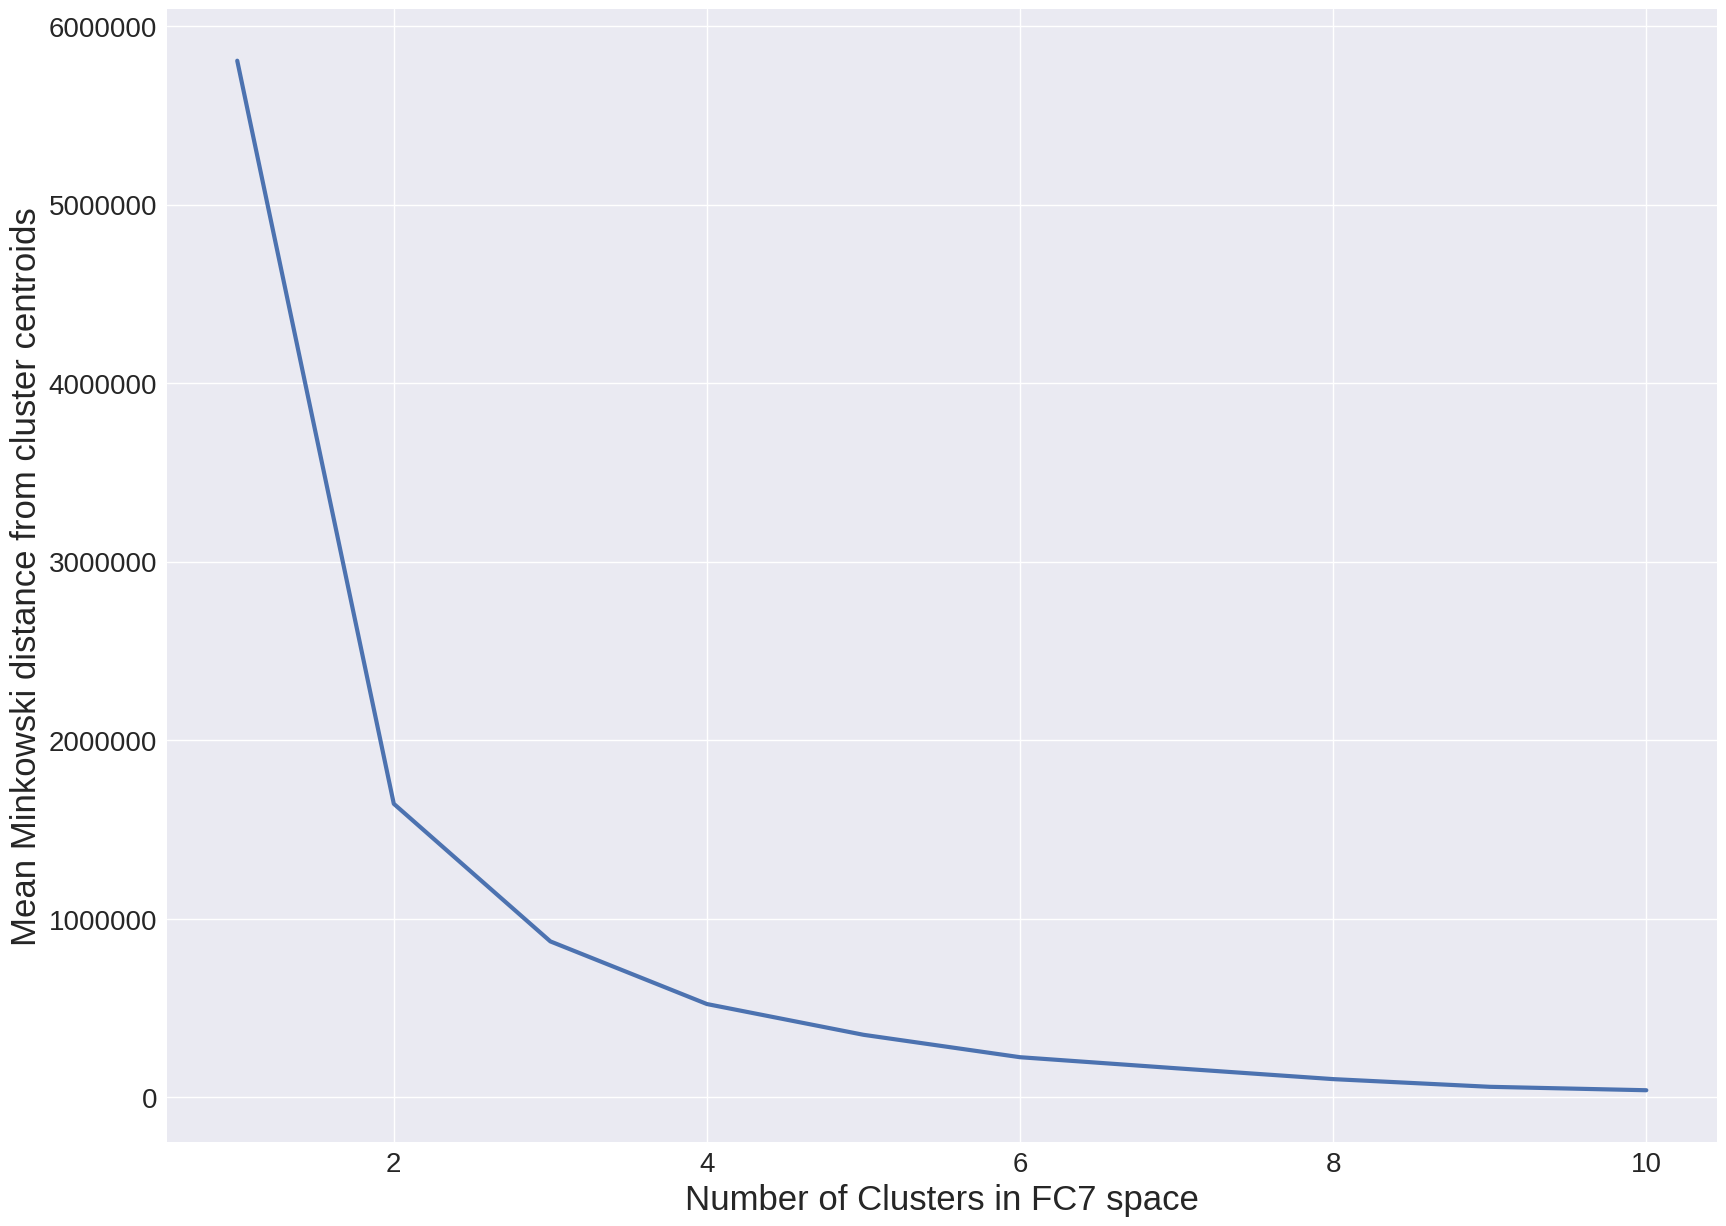

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
x = np.arange(1,11)
plt.plot(x,SSE_values[:10] ,linewidth = 3.0)
plt.xlabel("Number of Clusters in FC7 space", fontsize = 25)
plt.ylabel("Mean Minkowski distance from cluster centroids", fontsize = 25)
plt.show()